In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
data=pd.read_csv("Social_Network_Ads.csv")

In [92]:
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


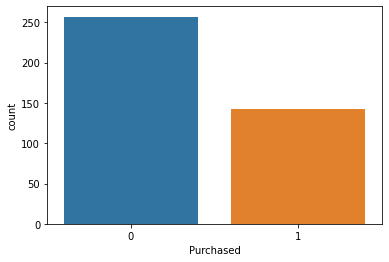

In [93]:
sns.countplot(x="Purchased",data=data)

In [94]:
X= data.iloc[: , :-1]

In [95]:
X

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [96]:
y= data.iloc[: , -1]

In [97]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [99]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
kf = StratifiedKFold(n_splits=5, random_state=0)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(X,y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt+=1

Fold:1, Train set: 320, Test set:80
Fold:2, Train set: 320, Test set:80
Fold:3, Train set: 320, Test set:80
Fold:4, Train set: 320, Test set:80
Fold:5, Train set: 320, Test set:80


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [113]:
models = [LogisticRegression(), SVC(), GaussianNB(), DecisionTreeClassifier(), RandomForestClassifier()]
models_names = ['Logistic Regression', 'SVC (SVM)', 'GaussianNB', 'Decision Tree Classifier', 'Random Forest Classifier']

In [114]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [115]:
kf = KFold(n_splits=5,random_state=19521242)
score_model=[]
for model in models:
  scores = []
  for train_index, test_index in kf.split(X):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index]
      y_train, y_test = y.iloc[train_index], y.iloc[test_index]
      scaler = StandardScaler()
      X_train= scaler.fit_transform(X_train)
      X_test=scaler.transform(X_test)
      model.fit(X_train, y_train)
      score=model.score(X_test,y_test)
      scores.append(score)
  score=round(np.mean(scores),2)
  print(f"Độ chính xác sử dụng KFold: của model {type(model).__name__} là {score} ")
  score_model.append(score)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


Độ chính xác sử dụng KFold: của model LogisticRegression là 0.82 
Độ chính xác sử dụng KFold: của model SVC là 0.91 
Độ chính xác sử dụng KFold: của model GaussianNB là 0.86 
Độ chính xác sử dụng KFold: của model DecisionTreeClassifier là 0.85 
Độ chính xác sử dụng KFold: của model RandomForestClassifier là 0.89 
